### Hypothesis 5

## K-Means Clustering

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

depression_no_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/depression_by_no.csv"))

depression_no_df .printSchema()


root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number): integer (nullable = true)

In [0]:
depression_no_df.show()

+-----------+----+----+----------------------------------------------------------------------+
 Entity|Code|Year|Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)|
+-----------+----+----+----------------------------------------------------------------------+
Afghanistan| AFG|1990| 439837|
Afghanistan| AFG|1991| 478890|
Afghanistan| AFG|1992| 545449|
Afghanistan| AFG|1993| 593044|
Afghanistan| AFG|1994| 613915|
Afghanistan| AFG|1995| 634196|
Afghanistan| AFG|1996| 654394|
Afghanistan| AFG|1997| 671950|
Afghanistan| AFG|1998| 677690|
Afghanistan| AFG|1999| 675439|
Afghanistan| AFG|2000| 680803|
Afghanistan| AFG|2001| 705861|
Afghanistan| AFG|2002| 748661|
Afghanistan| AFG|2003| 783016|
Afghanistan| AFG|2004| 815634|
Afghanistan| AFG|2005| 848531|
Afghanistan| AFG|2006| 871872|
Afghanistan| AFG|2007| 905474|
Afghanistan| AFG|2008| 943571|
Afghanistan| AFG|2009| 980619|
+-----------+----+----+----------------------------------------------------------------------+
only showing top 20 rows

In [0]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
import pandas as pd
pd.options.mode.chained_assignment = None

In [0]:
depression_no_df = depression_no_df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)", "Number_depression")\
          
depression_no_df.show()
depression_no_df.printSchema()

+-----------+-----------+----+-----------------+
 country|CountryCode|Year|Number_depression|
+-----------+-----------+----+-----------------+
Afghanistan| AFG|1990| 439837|
Afghanistan| AFG|1991| 478890|
Afghanistan| AFG|1992| 545449|
Afghanistan| AFG|1993| 593044|
Afghanistan| AFG|1994| 613915|
Afghanistan| AFG|1995| 634196|
Afghanistan| AFG|1996| 654394|
Afghanistan| AFG|1997| 671950|
Afghanistan| AFG|1998| 677690|
Afghanistan| AFG|1999| 675439|
Afghanistan| AFG|2000| 680803|
Afghanistan| AFG|2001| 705861|
Afghanistan| AFG|2002| 748661|
Afghanistan| AFG|2003| 783016|
Afghanistan| AFG|2004| 815634|
Afghanistan| AFG|2005| 848531|
Afghanistan| AFG|2006| 871872|
Afghanistan| AFG|2007| 905474|
Afghanistan| AFG|2008| 943571|
Afghanistan| AFG|2009| 980619|
+-----------+-----------+----+-----------------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- Number_depression: integer (nullable = true)

In [0]:
depression_no_df.createOrReplaceTempView("depression_no_df")
depression_no_df.count()

Out[6]: 8220

In [0]:
depressionNo_df=sqlContext.sql('select * from depression_no_df where Number_depression IS NOT NULL')
depressionNo_df.show()

+-----------+-----------+----+-----------------+
 country|CountryCode|Year|Number_depression|
+-----------+-----------+----+-----------------+
Afghanistan| AFG|1990| 439837|
Afghanistan| AFG|1991| 478890|
Afghanistan| AFG|1992| 545449|
Afghanistan| AFG|1993| 593044|
Afghanistan| AFG|1994| 613915|
Afghanistan| AFG|1995| 634196|
Afghanistan| AFG|1996| 654394|
Afghanistan| AFG|1997| 671950|
Afghanistan| AFG|1998| 677690|
Afghanistan| AFG|1999| 675439|
Afghanistan| AFG|2000| 680803|
Afghanistan| AFG|2001| 705861|
Afghanistan| AFG|2002| 748661|
Afghanistan| AFG|2003| 783016|
Afghanistan| AFG|2004| 815634|
Afghanistan| AFG|2005| 848531|
Afghanistan| AFG|2006| 871872|
Afghanistan| AFG|2007| 905474|
Afghanistan| AFG|2008| 943571|
Afghanistan| AFG|2009| 980619|
+-----------+-----------+----+-----------------+
only showing top 20 rows

In [0]:
depressionNo_df.count()

Out[8]: 8220

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType

bipolar_no_df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  option("encoding", "UTF-8").  
  option("ignoreLeadingWhiteSpace", True).
  option("ignoreTrailingWhiteSpace", True).
  option("multiLine", True).
  load("/FileStore/tables/bipolar_disorder_no.csv"))

bipolar_no_df.printSchema()

root
-- Entity: string (nullable = true)
-- Code: string (nullable = true)
-- Year: integer (nullable = true)
-- Prevalence - Bipolar disorder - Sex: Both - Age: All Ages (Number): double (nullable = true)

In [0]:
bipolar_no_df.show()

+-----------+----+----+------------------------------------------------------------------+
 Entity|Code|Year|Prevalence - Bipolar disorder - Sex: Both - Age: All Ages (Number)|
+-----------+----+----+------------------------------------------------------------------+
Afghanistan| AFG|1990| 65942.0403577435|
Afghanistan| AFG|1991| 72660.37951873663|
Afghanistan| AFG|1992| 83887.22000269916|
Afghanistan| AFG|1993| 91650.79407138744|
Afghanistan| AFG|1994| 94671.7290396215|
Afghanistan| AFG|1995| 97478.5754266916|
Afghanistan| AFG|1996| 100146.53275233686|
Afghanistan| AFG|1997| 102262.24816119656|
Afghanistan| AFG|1998| 102386.90519711474|
Afghanistan| AFG|1999| 101335.3214634287|
Afghanistan| AFG|2000| 101596.04465982708|
Afghanistan| AFG|2001| 105279.84749738632|
Afghanistan| AFG|2002| 111989.42311353856|
Afghanistan| AFG|2003| 117445.63559459466|
Afghanistan| AFG|2004| 122620.47827961874|
Afghanistan| AFG|2005| 127889.1123926518|
Afghanistan| AFG|2006| 131657.4482770735|
Afghanistan| AFG|2007| 137175.4685152979|
Afghanistan| AFG|2008| 143618.32873997075|
Afghanistan| AFG|2009| 149816.96778010207|
+-----------+----+----+------------------------------------------------------------------+
only showing top 20 rows

In [0]:
bipolar_no_df.count()

Out[11]: 8220

In [0]:
bipolar_no_df = bipolar_no_df.withColumnRenamed("Entity", "country")\
       .withColumnRenamed("Code", "CountryCode")\
       .withColumnRenamed("Year", "Year")\
       .withColumnRenamed("Prevalence - Bipolar disorder - Sex: Both - Age: All Ages (Number)", "Number_bipolar")\
          
bipolar_no_df.show()
bipolar_no_df.printSchema()

+-----------+-----------+----+------------------+
 country|CountryCode|Year| Number_bipolar|
+-----------+-----------+----+------------------+
Afghanistan| AFG|1990| 65942.0403577435|
Afghanistan| AFG|1991| 72660.37951873663|
Afghanistan| AFG|1992| 83887.22000269916|
Afghanistan| AFG|1993| 91650.79407138744|
Afghanistan| AFG|1994| 94671.7290396215|
Afghanistan| AFG|1995| 97478.5754266916|
Afghanistan| AFG|1996|100146.53275233686|
Afghanistan| AFG|1997|102262.24816119656|
Afghanistan| AFG|1998|102386.90519711474|
Afghanistan| AFG|1999| 101335.3214634287|
Afghanistan| AFG|2000|101596.04465982708|
Afghanistan| AFG|2001|105279.84749738632|
Afghanistan| AFG|2002|111989.42311353856|
Afghanistan| AFG|2003|117445.63559459466|
Afghanistan| AFG|2004|122620.47827961874|
Afghanistan| AFG|2005| 127889.1123926518|
Afghanistan| AFG|2006| 131657.4482770735|
Afghanistan| AFG|2007| 137175.4685152979|
Afghanistan| AFG|2008|143618.32873997075|
Afghanistan| AFG|2009|149816.96778010207|
+-----------+-----------+----+------------------+
only showing top 20 rows

root
-- country: string (nullable = true)
-- CountryCode: string (nullable = true)
-- Year: integer (nullable = true)
-- Number_bipolar: double (nullable = true)

In [0]:
bipolar_no_df.createOrReplaceTempView("bipolar_no_df")
bipolar_no_df.count()

Out[13]: 8220

In [0]:
bipolarNo_df=sqlContext.sql('select * from bipolar_no_df where Number_bipolar IS NOT NULL')
bipolarNo_df.show()

+-----------+-----------+----+------------------+
 country|CountryCode|Year| Number_bipolar|
+-----------+-----------+----+------------------+
Afghanistan| AFG|1990| 65942.0403577435|
Afghanistan| AFG|1991| 72660.37951873663|
Afghanistan| AFG|1992| 83887.22000269916|
Afghanistan| AFG|1993| 91650.79407138744|
Afghanistan| AFG|1994| 94671.7290396215|
Afghanistan| AFG|1995| 97478.5754266916|
Afghanistan| AFG|1996|100146.53275233686|
Afghanistan| AFG|1997|102262.24816119656|
Afghanistan| AFG|1998|102386.90519711474|
Afghanistan| AFG|1999| 101335.3214634287|
Afghanistan| AFG|2000|101596.04465982708|
Afghanistan| AFG|2001|105279.84749738632|
Afghanistan| AFG|2002|111989.42311353856|
Afghanistan| AFG|2003|117445.63559459466|
Afghanistan| AFG|2004|122620.47827961874|
Afghanistan| AFG|2005| 127889.1123926518|
Afghanistan| AFG|2006| 131657.4482770735|
Afghanistan| AFG|2007| 137175.4685152979|
Afghanistan| AFG|2008|143618.32873997075|
Afghanistan| AFG|2009|149816.96778010207|
+-----------+-----------+----+------------------+
only showing top 20 rows

In [0]:
bipolarNo_df.count()

Out[15]: 8220

### Join

In [0]:
country_number_df = sqlContext.sql( "SELECT bipolar_no_df.country, bipolar_no_df.CountryCode, bipolar_no_df.Year, Number_depression , bipolar_no_df.Number_bipolar FROM bipolar_no_df JOIN depression_no_df ON depression_no_df.CountryCode = bipolar_no_df.CountryCode")
country_number_df.show(20)


+-----------+-----------+----+-----------------+----------------+
 country|CountryCode|Year|Number_depression| Number_bipolar|
+-----------+-----------+----+-----------------+----------------+
Afghanistan| AFG|1990| 1435039|65942.0403577435|
Afghanistan| AFG|1990| 1382786|65942.0403577435|
Afghanistan| AFG|1990| 1332807|65942.0403577435|
Afghanistan| AFG|1990| 1283786|65942.0403577435|
Afghanistan| AFG|1990| 1238345|65942.0403577435|
Afghanistan| AFG|1990| 1201934|65942.0403577435|
Afghanistan| AFG|1990| 1165521|65942.0403577435|
Afghanistan| AFG|1990| 1119167|65942.0403577435|
Afghanistan| AFG|1990| 1071820|65942.0403577435|
Afghanistan| AFG|1990| 1025343|65942.0403577435|
Afghanistan| AFG|1990| 980619|65942.0403577435|
Afghanistan| AFG|1990| 943571|65942.0403577435|
Afghanistan| AFG|1990| 905474|65942.0403577435|
Afghanistan| AFG|1990| 871872|65942.0403577435|
Afghanistan| AFG|1990| 848531|65942.0403577435|
Afghanistan| AFG|1990| 815634|65942.0403577435|
Afghanistan| AFG|1990| 783016|65942.0403577435|
Afghanistan| AFG|1990| 748661|65942.0403577435|
Afghanistan| AFG|1990| 705861|65942.0403577435|
Afghanistan| AFG|1990| 680803|65942.0403577435|
+-----------+-----------+----+-----------------+----------------+
only showing top 20 rows

In [0]:
country_number_df.groupBy('country').avg('Number_depression','Number_bipolar').sort('country').show(20)

+-------------------+----------------------+-------------------+
 country|avg(Number_depression)|avg(Number_bipolar)|
+-------------------+----------------------+-------------------+
 Afghanistan| 884179.8| 135047.09908425433|
 Albania| 76420.76666666666| 17112.887909600533|
 Algeria| 1290813.6666666667| 248818.803153244|
 American Samoa| 1296.6333333333334| 141.20074959597775|
 Andorra| 3078.0333333333333| 787.6218758530852|
 Angola| 773793.7333333333| 79353.1575598794|
Antigua and Barbuda| 2382.5666666666666| 788.399566680405|
 Argentina| 1000879.6333333333| 401064.23377069336|
 Armenia| 99081.06666666667| 18699.1320425455|
 Australia| 1006692.7333333333| 242978.78498465553|
 Austria| 318180.5333333333| 85056.82903284315|
 Azerbaijan| 230218.73333333334| 47321.1779802439|
 Bahamas| 9793.833333333334| 3067.884783715678|
 Bahrain| 48464.63333333333| 8284.696939409212|
 Bangladesh| 5275839.4| 468934.7309528021|
 Barbados| 9365.566666666668| 2727.3355915683214|
 Belarus| 476020.3| 58923.41461071272|
 Belgium| 417777.13333333336| 107105.14244002521|
 Belize| 8103.6| 2412.0436917048296|
 Benin| 240367.26666666666| 33521.242988857535|
+-------------------+----------------------+-------------------+
only showing top 20 rows

In [0]:
display(country_number_df.groupBy('country').avg('Number_depression','Number_bipolar').sort('country'))
test_df = country_number_df.groupBy('country').avg('Number_depression','Number_bipolar').sort('country')


country,avg(Number_depression),avg(Number_bipolar)
Afghanistan,884179.8,135047.09908425433
Albania,76420.76666666666,17112.887909600533
Algeria,1290813.6666666667,248818.803153244
American Samoa,1296.6333333333334,141.20074959597775
Andorra,3078.0333333333333,787.6218758530852
Angola,773793.7333333333,79353.1575598794
Antigua and Barbuda,2382.5666666666666,788.399566680405
Argentina,1000879.6333333333,401064.23377069336
Armenia,99081.06666666667,18699.1320425455
Australia,1006692.7333333333,242978.78498465553


+--------------------+----------+
 features|prediction|
+--------------------+----------+
[884179.8,135047....| 6|
[76420.7666666666...| 0|
[1290813.66666666...| 6|
[1296.63333333333...| 0|
[3078.03333333333...| 0|
[773793.733333333...| 6|
[2382.56666666666...| 0|
[1000879.63333333...| 6|
[99081.0666666666...| 0|
[1006692.73333333...| 6|
[318180.533333333...| 0|
[230218.733333333...| 0|
[9793.83333333333...| 0|
[48464.6333333333...| 0|
[5275839.4,468934...| 7|
[9365.56666666666...| 0|
[476020.3,58923.4...| 0|
[417777.133333333...| 0|
[8103.6,2412.0436...| 0|
[240367.266666666...| 0|
+--------------------+----------+
only showing top 20 rows

+----------+--------------------+----------------------+--------------------+
prediction| country|avg(Number_depression)| avg(Number_bipolar)|
+----------+--------------------+----------------------+--------------------+
 6| Chad| 335183.9666666667| 39158.22840182734|
 6| Paraguay| 182024.03333333333| 57686.48222029208|
 6| Russia| 5569125.033333333| 868587.212176355|
 6| World| 2.2634195446666667E8|3.2018898327591177E7|
 6| Yemen| 811825.8| 127966.33511296743|
 6| Senegal| 319708.1666666667| 49971.60981560517|
 6| Sweden| 445246.63333333336| 99914.1872642439|
 6| Tokelau| 38.96666666666667| 3.431948791748625|
 6| Kiribati| 2429.8333333333335| 215.50254169249|
 6| Guyana| 34491.066666666666| 6439.3529112720025|
 6| Eritrea| 165115.1| 23063.078917677925|
 6| Philippines| 2094992.0333333334| 264593.3107997508|
 6| Djibouti| 27395.666666666668| 4242.286123449892|
 6| Tonga| 2296.4666666666667| 248.16693765084295|
 6| Malaysia| 815148.1| 84206.50338124267|
 6| Singapore| 112931.4| 36938.415095882956|
 6| Fiji| 22949.1| 2230.381853956322|
 6| Turkey| 2949504.7| 588944.8527164408|
 6|United States Vir...| 3828.1666666666665| 1038.5756168134515|
 6| Malawi| 373308.6| 59224.824319098196|
+----------+--------------------+----------------------+--------------------+
only showing top 20 rows

<command-3350679962880617>:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
 threedee = plt.figure(figsize=(12,10)).gca(projection='3d')

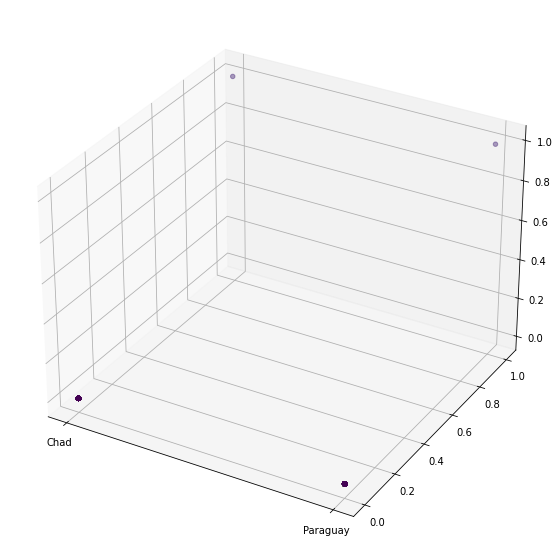

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-3350679962880617> in <module> 
 31 
 32 threedee = plt . figure ( figsize = ( 12 , 10 ) ) . gca ( projection = '3d' ) 
 ---> 33 threedee . scatter ( pddf_pred . country , pddf_pred . prediction , pddf_pred . prediction , c = pddf_pred . prediction ) 
 34 threedee . set_xlabel ( 'country' ) 
 35 threedee . set_ylabel ( 'y' ) 

 /databricks/python/lib/python3.8/site-packages/mpl_toolkits/mplot3d/axes3d.py in scatter (self, xs, ys, zs, zdir, s, c, depthshade, *args, **kwargs) 
 2421 self . set_zmargin ( 0.05 ) 
 2422 
 -> 2423 self . auto_scale_xyz ( xs , ys , zs , had_data ) 
 2424 
 2425 return patches

 /databricks/python/lib/python3.8/site-packages/mpl_toolkits/mplot3d/axes3d.py in auto_scale_xyz (self, X, Y, Z, had_data) 
 708 X = np . reshape ( X , - 1 ) 
 709 Y = np . reshape ( Y , - 1 ) 
 --> 710 self.xy_dataLim.update_from_data_xy(
 711 np.column_stack([X, Y]), not had_data)
 712 if Z is not None : 

 /databricks/python/lib/python3.8/site-packages/matplotlib/transforms.py in update_from_data_xy (self, xy, ignore, updatex, updatey) 
 932 return 
 933 
 --> 934 path = Path ( xy ) 
 935 self.update_from_path(path, ignore=ignore,
 936 updatex=updatex, updatey=updatey)

 /databricks/python/lib/python3.8/site-packages/matplotlib/path.py in __init__ (self, vertices, codes, _interpolation_steps, closed, readonly) 
 126 and codes as read - only arrays . 
 127 """
 --> 128 vertices = _to_unmasked_float_array ( vertices ) 
 129 _api . check_shape ( ( None , 2 ) , vertices = vertices ) 
 130 

 /databricks/python/lib/python3.8/site-packages/matplotlib/cbook/__init__.py in _to_unmasked_float_array (x) 
 1331 return np . ma . asarray ( x , float ) . filled ( np . nan ) 
 1332 else : 
 -> 1333 return np . asarray ( x , float ) 
 1334 
 1335 

 /databricks/python/lib/python3.8/site-packages/numpy/core/_asarray.py in asarray (a, dtype, order) 
 81 
 82 """
 ---> 83 return array ( a , dtype , copy = False , order = order ) 
 84 
 85 

 ValueError : could not convert string to float: 'Chad'

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np
# Convert from dataframe features to a "features" column that is a vector


inputCols = ['avg(Number_depression)', 'avg(Number_bipolar)']
vecAssembler = VectorAssembler(inputCols= inputCols, outputCol="features")
df_kmeans = vecAssembler.transform(test_df ).select(['features'])
# df_kmeans.show()

# Trains a k-means model.
    
# kmeans = KMeans().setK(2).setSeed(5)
k = 10
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
predictions = model.transform(df_kmeans)
predictions.show()
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)

#Assign cluster to events
transformed = model.transform(df_kmeans).select('prediction')
rows = transformed.collect()
df_pred = sqlContext.createDataFrame(rows)
df_pred = df_pred.join(test_df)
df_pred.show()


